In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

EDA

In [3]:
df=pd.read_csv("Cars.csv",index_col=0)
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
Name,,,,,,,,,,,,,,
Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [4]:
df.shape

(5961, 14)

In [5]:
df.isna().sum()

Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5137
Price                   0
dtype: int64

In [6]:
df.nunique()

Location               11
Year                   22
Kilometers_Driven    3068
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               439
Engine                143
Power                 369
Colour                  3
Seats                   8
No. of Doors            3
New_Price             540
Price                1369
dtype: int64

In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 5961 entries, Mahindra Scorpio to Hyundai i10
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5950 non-null   object 
 1   Year               5959 non-null   float64
 2   Kilometers_Driven  5953 non-null   float64
 3   Fuel_Type          5961 non-null   object 
 4   Transmission       5934 non-null   object 
 5   Owner_Type         5946 non-null   object 
 6   Mileage            5959 non-null   object 
 7   Engine             5944 non-null   object 
 8   Power              5929 non-null   object 
 9   Colour             5950 non-null   object 
 10  Seats              5956 non-null   float64
 11  No. of Doors       5960 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              5961 non-null   float64
dtypes: float64(5), object(9)
memory usage: 698.6+ KB


,Year,Kilometers_Driven,Seats,No. of Doors,Price
count,5959.000000,5.953000e+03,5956.000000,5960.000000,5961.000000
mean,2013.389159,5.871110e+04,5.269140,4.114933,9.528103
std,3.243051,9.171221e+04,0.789048,0.344757,11.214382
min,1998.000000,1.710000e+02,2.000000,2.000000,0.440000
25%,2011.500000,3.393100e+04,5.000000,4.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,4.000000,5.660000
75%,2016.000000,7.300000e+04,5.000000,4.000000,10.000000
max,2019.000000,6.500000e+06,10.000000,5.000000,160.000000


<Axes: ylabel='Name'>

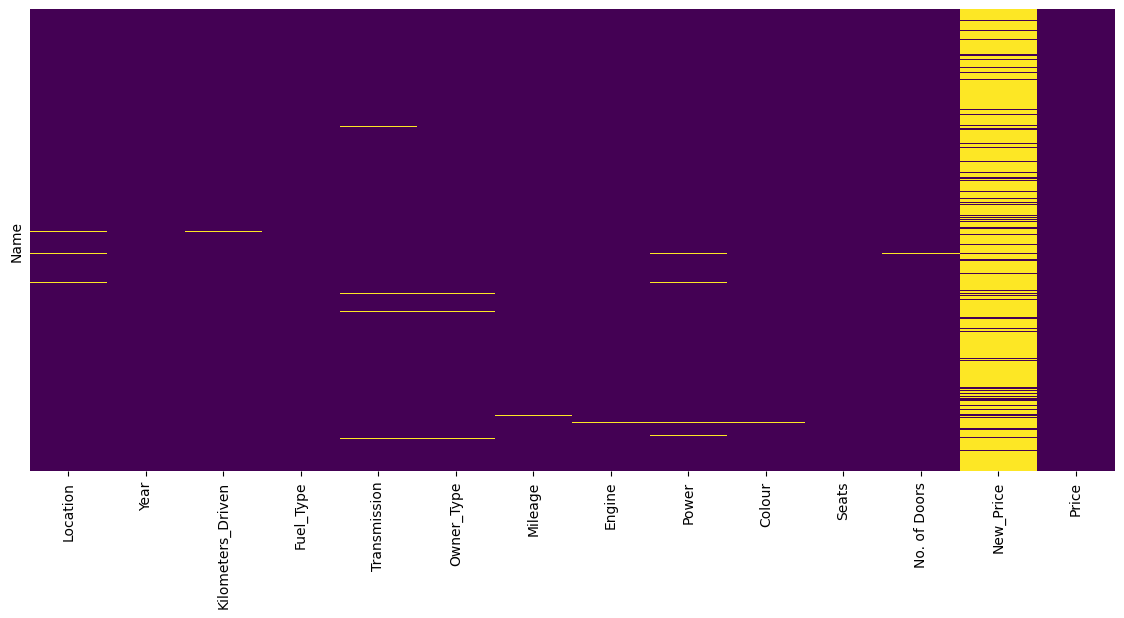

In [8]:
#visuallizing missing values
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
print( "Percent of missing :\n\n", round(df.isna().sum() / df.isna().count() * 100, 2)) 

Percent of missing :

 Location              0.18
Year                  0.03
Kilometers_Driven     0.13
Fuel_Type             0.00
Transmission          0.45
Owner_Type            0.25
Mileage               0.03
Engine                0.29
Power                 0.54
Colour                0.18
Seats                 0.08
No. of Doors          0.02
New_Price            86.18
Price                 0.00
dtype: float64


 A categorical variable is a type of variable that represents distinct categories or groups, and it can take on values that belong to these categories. 
For example, "color" can be a categorical variable with categories like red, blue, and green.

In [10]:
#list of categorical variables
lst=['Location','Fuel_Type','Transmission','Owner_Type','Seats','No. of Doors','Colour','Year']
for i in lst:
    print(i,"\n")
    print(df[i].value_counts())
    print('-'*50)

Location 

Mumbai        781
Hyderabad     739
Kochi         646
Coimbatore    630
Pune          611
Delhi         549
Kolkata       526
Chennai       489
Jaipur        406
Bangalore     351
Ahmedabad     222
Name: Location, dtype: int64
--------------------------------------------------
Fuel_Type 

Diesel      3188
Petrol      2705
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Transmission 

Manual       4225
Automatic    1709
Name: Transmission, dtype: int64
--------------------------------------------------
Owner_Type 

First             4875
Second             953
Third              110
Fourth & Above       8
Name: Owner_Type, dtype: int64
--------------------------------------------------
Seats 

5.0     5013
7.0      674
8.0      117
4.0       99
6.0       31
2.0       17
10.0       3
9.0        2
Name: Seats, dtype: int64
--------------------------------------------------
No. of Doors 

4.0    

Data Preprocessing

In [11]:
np.random.seed(9)
df[['Engine','Power','Mileage']].sample(10)

,Engine,Power,Mileage
Name,,,
Ford Figo,1498 CC,99 bhp,25.83 kmpl
Nissan Terrano,1461 CC,83.14 bhp,19.87 kmpl
Maruti Alto,998 CC,67.1 bhp,24.07 kmpl
Maruti Eeco,1196 CC,73 bhp,15.1 kmpl
Toyota Innova,2755 CC,171.5 bhp,11.36 kmpl
Jaguar F,5000 CC,488.1 bhp,12.5 kmpl
Toyota Innova,2494 CC,102 bhp,12.8 kmpl
Volkswagen Polo,1498 CC,88 bhp,20.14 kmpl
Maruti Celerio,998 CC,67.04 bhp,23.1 kmpl


In [12]:
# Dropping units from mileages,Engine and Power.
df["Mileage"] = df["Mileage"].str.rstrip(" kmpl")
df["Mileage"] = df["Mileage"].str.rstrip(" km/g")

df["Engine"] = df["Engine"].str.rstrip(" CC")

df["Power"] = df["Power"].str.rstrip(" bhp")

In [13]:
df[['Engine','Power','Mileage']].sample(5)
#units removed

,Engine,Power,Mileage
Name,,,
Toyota Innova,2494,100.6,12.99
Toyota Etios,1496,88.7,17.6
Hyundai i20,1197,80,18.5
Hyundai Verna,1591,121.3,15.74
Mahindra XUV500,2179,140,16.0


In [14]:
df.loc[df["Mileage"] == '0.0', 'Mileage'].count()
#there are 56 values where mileage is zero.

56

In [15]:
print(df["Transmission"].unique())

['Manual' 'Automatic' nan]


In [16]:
#converting object data type to category data type

#replacing null or nan values with "unknown" so that we convert its type to "category"
df["Transmission"] = df["Transmission"].replace('null', 'Unknown').astype("category")

df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")

#converting datatype  
df["Mileage"] = df["Mileage"].astype(float)
df["Engine"]=df["Engine"].astype(float)

#handle null values
df["Power"] = df["Power"].replace('null', 0).astype(float)

In [17]:
df.describe().T
#T for transpose

,count,mean,std,min,25%,50%,75%,max
Year,5959.0,2013.389159,3.243051,1998.00,2011.50,2014.00,2016.0,2019.00
Kilometers_Driven,5953.0,58711.100118,91712.207172,171.00,33931.00,53000.00,73000.0,6500000.00
Mileage,5959.0,18.184499,4.524639,0.00,15.26,18.16,21.1,33.54
Engine,5944.0,1622.552995,601.689666,72.00,1198.00,1493.00,1984.0,5998.00
Power,5929.0,111.463508,55.481567,0.00,74.00,93.70,138.1,560.00
Seats,5956.0,5.269140,0.789048,2.00,5.00,5.00,5.0,10.00
No. of Doors,5960.0,4.114933,0.344757,2.00,4.00,4.00,4.0,5.00
Price,5961.0,9.528103,11.214382,0.44,3.50,5.66,10.0,160.00


In [18]:
#calculating age of car for better analysis
Current_year=2023;
df['Age']= Current_year - df['Year']

In [19]:
df.head(2)
#Age column added

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age
Name,,,,,,,,,,,,,,,
Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,11.0
Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,5.0


Now, we will extract the brand name and the model name from the 'Name'.

WHY?   model name and brand name can help us predict the price.


In [20]:
df.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour', 'Seats',
       'No. of Doors', 'New_Price', 'Price', 'Age'],
      dtype='object')

In [21]:
#right now 'Name' is not a column, it is the index of dataframe
#resetting the index of DataFrame, which will make 'Name' a regular column.
df.reset_index(inplace=True)

In [22]:
df.head(2)
#Name is a column now.

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,11.0
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,5.0


In [23]:
#checking if column 'Name' has missing values.
df[df['Name'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age


In [24]:
df["Name"] = df["Name"].str.replace('Land Rover', 'Landrover')
df["Name"] = df["Name"].str.replace('Mini Cooper', 'MiniCooper')

#Extracting Brand Name and Model Name
df['Brand'] = df['Name'].str.split(' ').str[0] #Separating Brand name from the Name
df['Model'] = df['Name'].str.split(' ').str[1] #Separating Model name from the Name

In [25]:
print('Brand name')
print(df['Brand'].unique())
print('\n Model name')
print(df['Model'].unique())

Brand name
['Mahindra' 'Maruti' 'Hyundai' 'Toyota' 'Honda' 'Chevrolet' 'Audi' 'Skoda'
 'Renault' 'Landrover' 'BMW' 'ISUZU' 'Jaguar' 'Mercedes-Benz' 'Volkswagen'
 'Tata' 'Mitsubishi' 'Ford' 'Nissan' 'Volvo' 'Fiat' 'Porsche' 'MiniCooper'
 'Datsun' 'Jeep' 'Force' 'Isuzu' 'Smart' 'Lamborghini' 'Mini' 'Bentley']

 Model name
['Scorpio' 'Baleno' 'Xylo' 'Grand' 'Innova' 'WRV' 'Verna' 'Fortuner'
 'Beat' 'A6' 'i20' 'Laura' 'City' 'Q7' 'Duster' 'Ertiga' 'Freelander'
 'Rapid' 'Zen' '3' 'Wagon' 'Jazz' 'Vitara' 'D-MAX' 'SX4' 'i10' 'Amaze'
 'Xcent' 'F' 'C-Class' 'Polo' '5' 'Thar' 'Alto' 'A3' 'Xenon' 'X1' 'Getz'
 'Vento' 'Sail' 'Jetta' 'Ciaz' 'CR-V' 'XUV500' 'New' 'Civic' 'Superb'
 'Ritz' 'Pajero' 'Corolla' 'Elantra' 'Figo' 'EON' 'Teana' 'Swift' 'CLA'
 'Range' 'Q3' 'Fiesta' 'Indica' 'Ecosport' 'S80' 'Fabia' 'A4' 'E-Class'
 'Brio' 'Discovery' 'Ikon' 'Santa' 'Bolero' 'Dzire' 'KWID' 'Celerio'
 'Optra' 'GLC' 'X3' 'Micra' 'Etios' 'Creta' 'Endeavour' '7' 'X5' 'Octavia'
 'Zest' 'Scala' 'B' 'EcoSport' 'TUV' 

In [26]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age,Brand,Model
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,NaN,6.00,11.0,Mahindra,Scorpio
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,NaN,8.32,5.0,Maruti,Baleno
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,NaN,4.00,10.0,Mahindra,Xylo
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,NaN,3.49,9.0,Hyundai,Grand
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,NaN,6.40,12.0,Toyota,Innova


In [27]:
sorted(df['Brand'].unique())

['Audi',
 'BMW',
 'Bentley',
 'Chevrolet',
 'Datsun',
 'Fiat',
 'Force',
 'Ford',
 'Honda',
 'Hyundai',
 'ISUZU',
 'Isuzu',
 'Jaguar',
 'Jeep',
 'Lamborghini',
 'Landrover',
 'Mahindra',
 'Maruti',
 'Mercedes-Benz',
 'Mini',
 'MiniCooper',
 'Mitsubishi',
 'Nissan',
 'Porsche',
 'Renault',
 'Skoda',
 'Smart',
 'Tata',
 'Toyota',
 'Volkswagen',
 'Volvo']

In [28]:
# notice in brand names : 'ISUZU' , 'isuzu'
#correcting brand names
df.loc[df.Brand == 'ISUZU','Brand']='Isuzu'

In [29]:
df.Model.isnull().sum()

24

In [30]:
#drop row with no model
df.dropna(subset=['Model'],axis=0,inplace=True)

In [31]:
sorted(df['Model'].unique())

['1',
 '1000',
 '3',
 '5',
 '6',
 '7',
 '800',
 'A',
 'A-Star',
 'A3',
 'A4',
 'A6',
 'A7',
 'A8',
 'Accent',
 'Accord',
 'Alto',
 'Amaze',
 'Ameo',
 'Aspire',
 'Aveo',
 'Avventura',
 'B',
 'BR-V',
 'BRV',
 'Baleno',
 'Beat',
 'Beetle',
 'Bolero',
 'Bolt',
 'Boxster',
 'Brio',
 'C-Class',
 'CLA',
 'CLS-Class',
 'CR-V',
 'Camry',
 'Captiva',
 'Captur',
 'Cayenne',
 'Cayman',
 'Cedia',
 'Celerio',
 'Ciaz',
 'City',
 'Civic',
 'Classic',
 'Clubman',
 'Compass',
 'Continental',
 'Corolla',
 'Countryman',
 'Creta',
 'CrossPolo',
 'Cruze',
 'D-MAX',
 'Discovery',
 'Duster',
 'Dzire',
 'E',
 'E-Class',
 'EON',
 'EcoSport',
 'Ecosport',
 'Eeco',
 'Elantra',
 'Elite',
 'Endeavour',
 'Enjoy',
 'Ertiga',
 'Esteem',
 'Etios',
 'Evalia',
 'F',
 'Fabia',
 'Fiesta',
 'Figo',
 'Fluence',
 'Fortuner',
 'Fortwo',
 'Freelander',
 'Freestyle',
 'Fusion',
 'GL-Class',
 'GLA',
 'GLC',
 'GLE',
 'GLS',
 'GO',
 'Gallardo',
 'Getz',
 'Grand',
 'Grande',
 'Hexa',
 'Ignis',
 'Ikon',
 'Indica',
 'Indigo',
 'Innova

In [32]:
df[(df['Model'] == 'BR-V') | (df['Model'] == 'BRV')]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price,Age,Brand,Model
306,Honda BRV,Mumbai,2017.0,17000.0,Petrol,Automatic,First,16.0,1497.0,117.3,Black/Silver,7.0,5.0,15.02 Lakh,9.50,6.0,Honda,BRV
2564,Honda BRV,Mumbai,2017.0,18000.0,Petrol,Automatic,First,16.0,1497.0,117.3,Others,7.0,5.0,15.02 Lakh,9.25,6.0,Honda,BRV
2770,Honda BR-V,Bangalore,2016.0,34004.0,Petrol,Manual,First,15.4,1497.0,117.3,Others,7.0,5.0,12.9 Lakh,8.02,7.0,Honda,BR-V
2789,Honda BRV,Pune,2016.0,9200.0,Petrol,Manual,First,15.4,1497.0,117.3,White,7.0,5.0,13.58 Lakh,8.00,7.0,Honda,BRV
3845,Honda BRV,Mumbai,2017.0,16503.0,Petrol,Automatic,First,16.0,1497.0,117.3,Others,7.0,5.0,15.02 Lakh,9.50,6.0,Honda,BRV
3891,Honda BR-V,Pune,2017.0,9000.0,Petrol,Manual,First,15.4,1497.0,117.3,Black/Silver,7.0,5.0,12.51 Lakh,8.50,6.0,Honda,BR-V
4936,Honda BR-V,Kochi,2017.0,32249.0,Diesel,Manual,First,21.9,1498.0,98.6,White,7.0,5.0,15.45 Lakh,10.79,6.0,Honda,BR-V
5394,Honda BRV,Kochi,2017.0,35676.0,Petrol,Automatic,First,16.0,1497.0,117.3,White,7.0,5.0,14.65 Lakh,9.48,6.0,Honda,BRV


In [33]:
# notice in model names : 'BR-V' , 'BRV',  'EcoSport','Ecosport'
#correcting model names
df.loc[df.Model == 'BR-v','Brand']='BRV'
df.loc[df.Model == 'EcoSport','Brand']='Ecosport'

In [34]:
df.Model.nunique()

208

In [35]:
df.groupby('Model')['Model'].size().nlargest(5)
#top 5 most popular models

Model
Swift     343
City      265
i20       247
Verna     170
Innova    164
Name: Model, dtype: int64

## EDA

In [36]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5937 entries, 0 to 5960
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5937 non-null   object  
 1   Location           5926 non-null   object  
 2   Year               5935 non-null   float64 
 3   Kilometers_Driven  5929 non-null   float64 
 4   Fuel_Type          5937 non-null   category
 5   Transmission       5910 non-null   category
 6   Owner_Type         5922 non-null   category
 7   Mileage            5935 non-null   float64 
 8   Engine             5920 non-null   float64 
 9   Power              5905 non-null   float64 
 10  Colour             5926 non-null   object  
 11  Seats              5932 non-null   float64 
 12  No. of Doors       5936 non-null   float64 
 13  New_Price          809 non-null    object  
 14  Price              5937 non-null   float64 
 15  Age                5935 non-null   float64 
 16  Brand 

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,No. of Doors,Price,Age
count,5935.000000,5.929000e+03,5935.000000,5920.000000,5905.000000,5932.000000,5936.000000,5937.000000,5935.000000
mean,2013.382982,5.884245e+04,18.181700,1622.047128,111.318838,5.272758,4.115398,9.458599,9.617018
std,3.245917,9.186953e+04,4.528727,602.672396,55.500001,0.787985,0.345376,11.176953,3.245917
min,1998.000000,1.710000e+02,0.000000,72.000000,0.000000,2.000000,2.000000,0.440000,4.000000
25%,2011.000000,3.400000e+04,15.200000,1198.000000,74.000000,5.000000,4.000000,3.500000,7.000000
50%,2014.000000,5.310500e+04,18.160000,1493.000000,91.720000,5.000000,4.000000,5.650000,9.000000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,4.000000,9.900000,12.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,5.000000,160.000000,25.000000


160 lakhs price is for an used car is quite high, seems to be an outlier.

age of car: 4 years old to 25 years old

years ranges from 1998- 2019 . Age of cars 4 year old to 25 years old

Kilometer driven , mean is ~58K .

<Axes: >

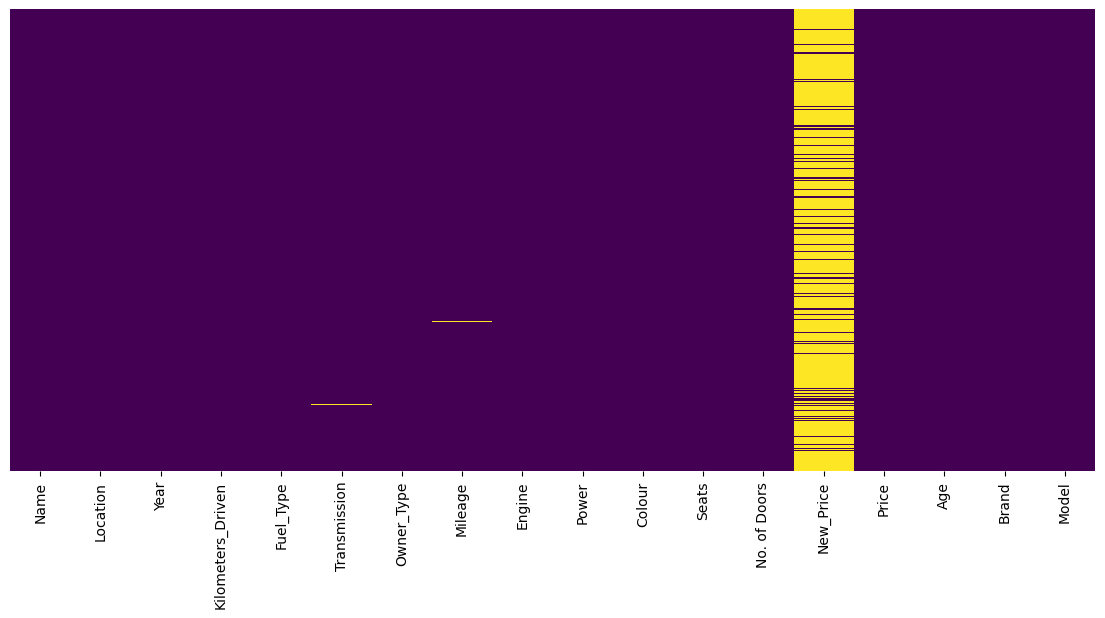

In [37]:
#visuallizing missing values
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<Axes: xlabel='Price', ylabel='Count'>

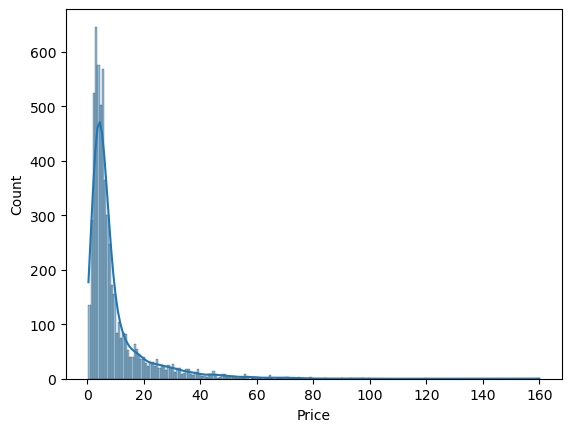

In [38]:
sns.histplot(df['Price'],kde=True,bins=200)
#price is right skewed

<Axes: xlabel='Year', ylabel='count'>

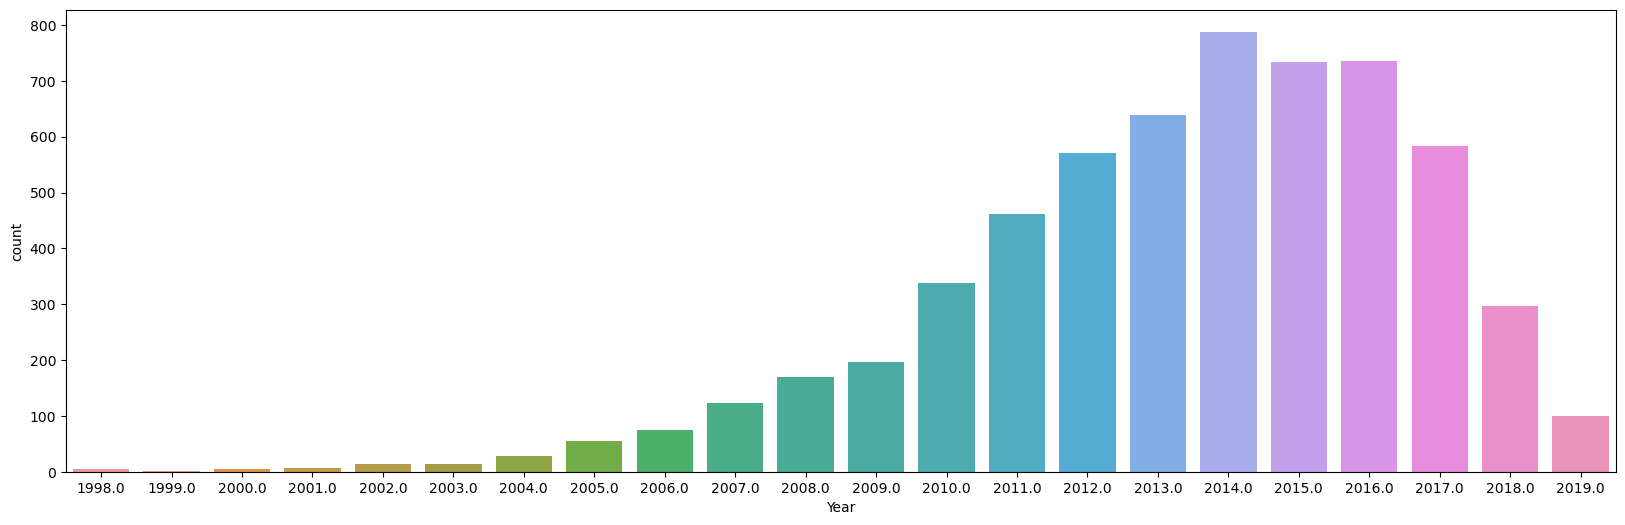

In [39]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Year')
# year is left skewed

<Axes: xlabel='Fuel_Type', ylabel='Price'>

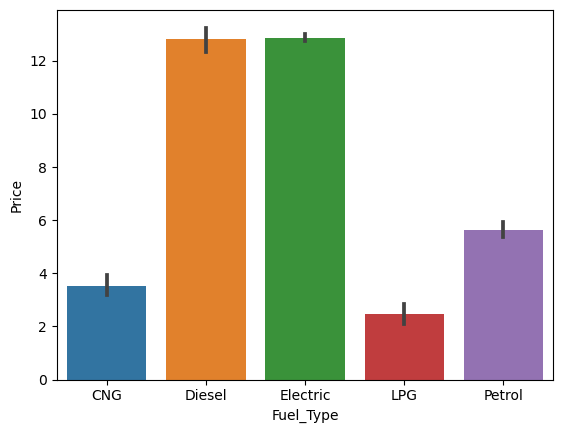

In [40]:
# Fuel_Type vs Price
sns.barplot(x='Fuel_Type',y='Price',data=df)
# diesel and electric cars have higher price

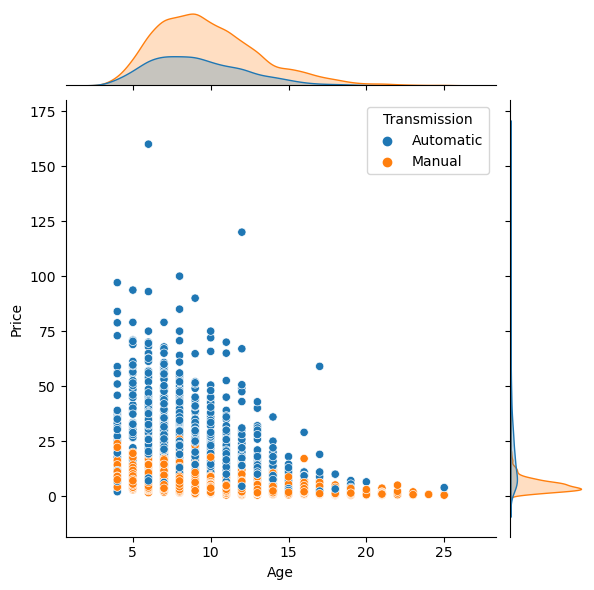

In [41]:
sns.jointplot(data=df,x='Age',y='Price',hue='Transmission')
#automatic cars have higher price than manual

<Axes: xlabel='Age', ylabel='count'>

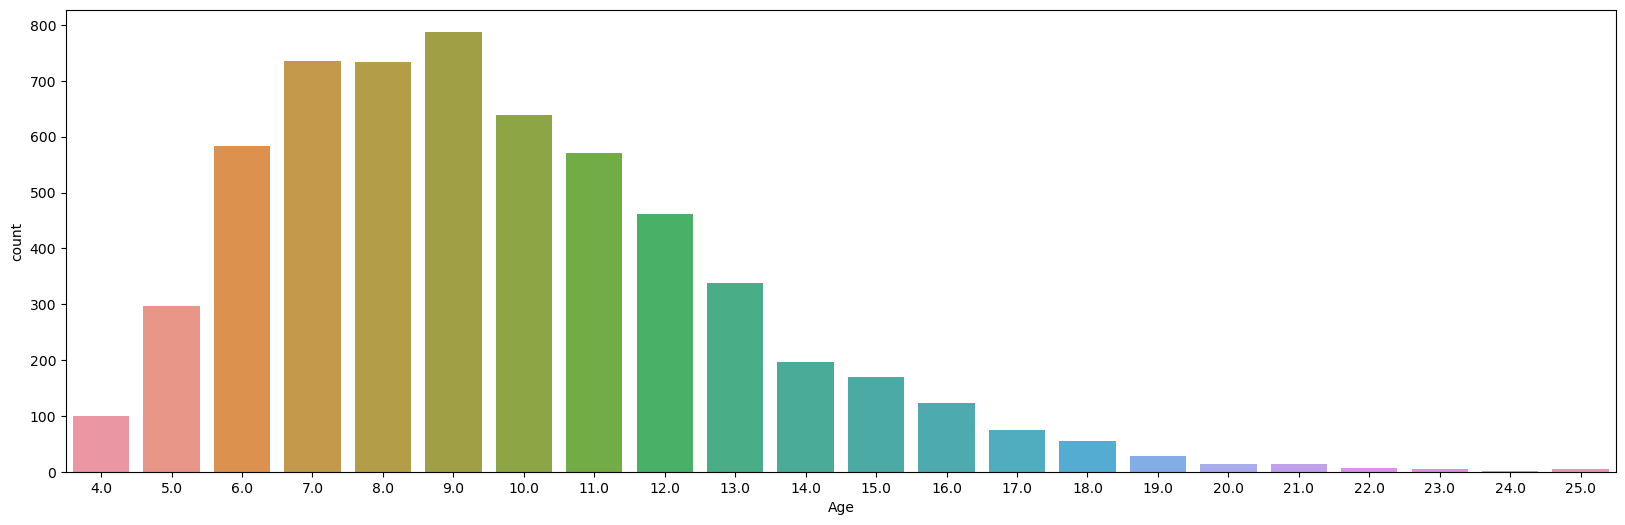

In [42]:
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Age')
#right skewed

<Axes: xlabel='Brand', ylabel='count'>

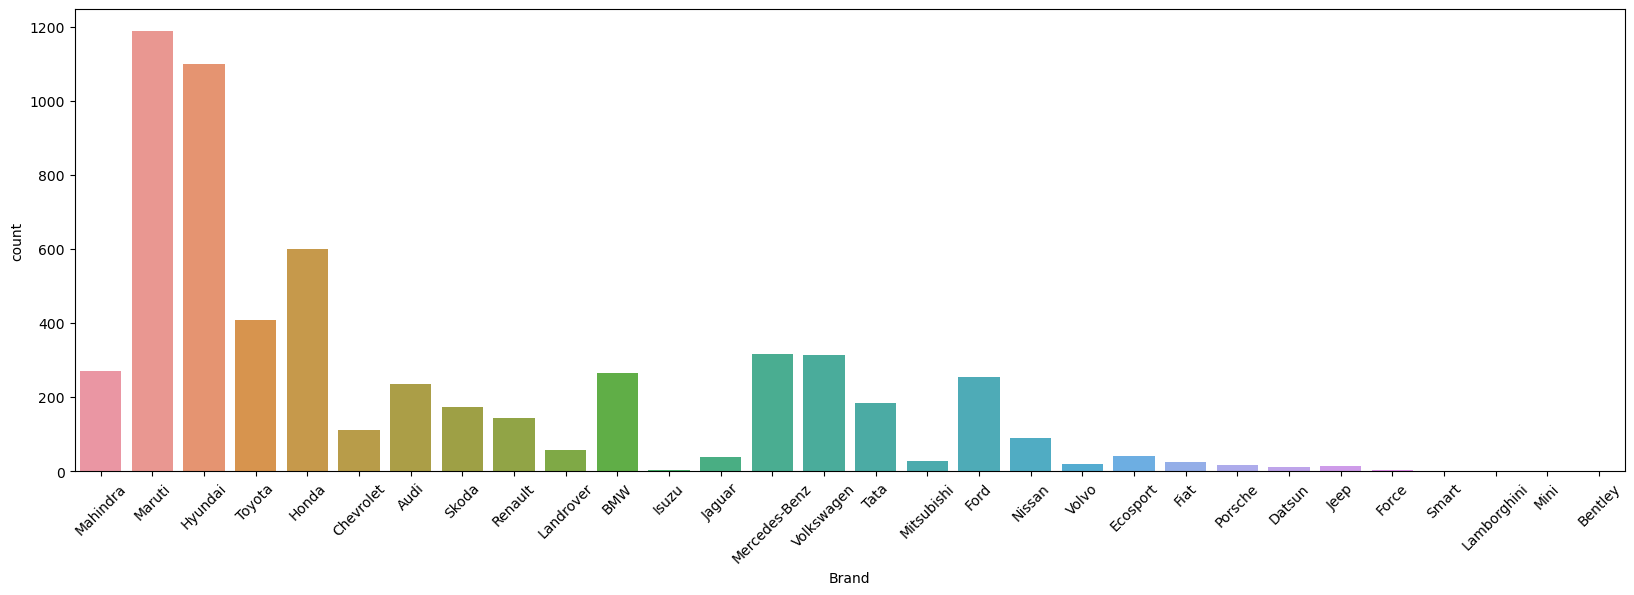

In [43]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
sns.countplot(data=df, x='Brand')
#top brands are maruti and hyundai

<Axes: xlabel='Location', ylabel='count'>

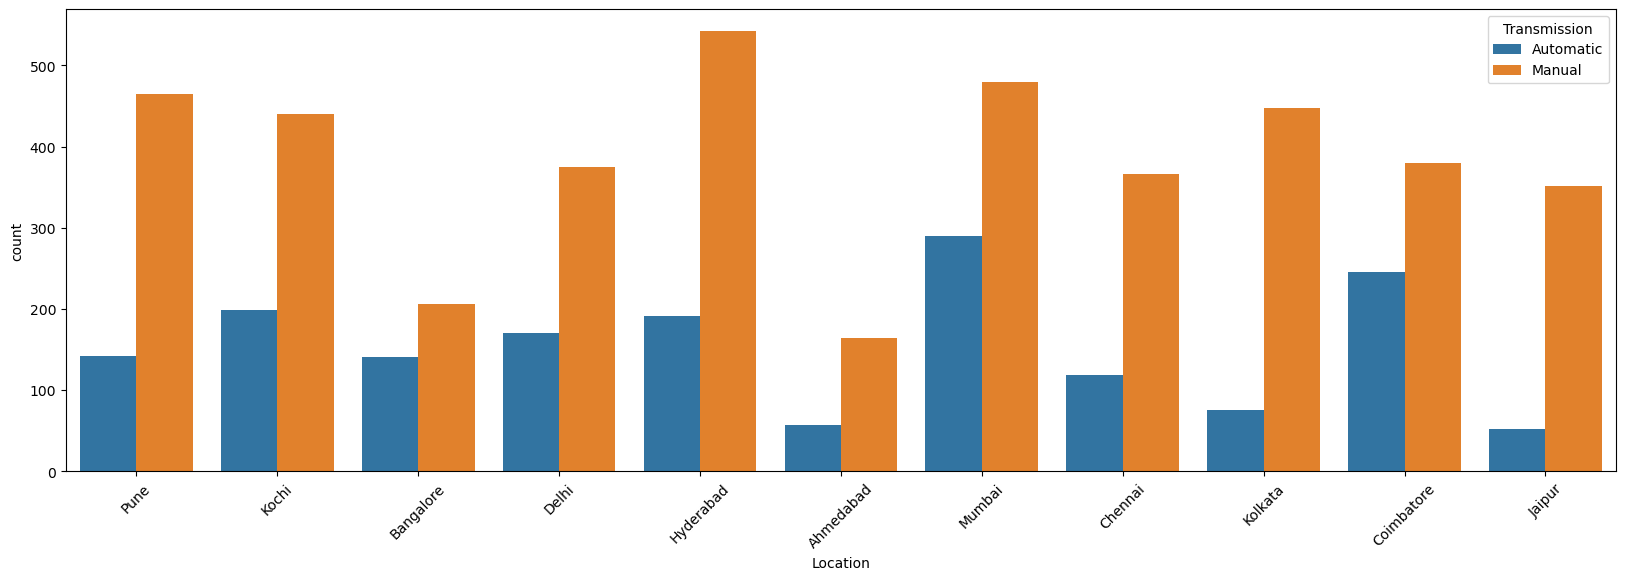

In [44]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)
sns.countplot(data=df, x='Location',hue='Transmission')
#more no of manual cars are there than automatic cars

<Axes: xlabel='Year', ylabel='Price'>

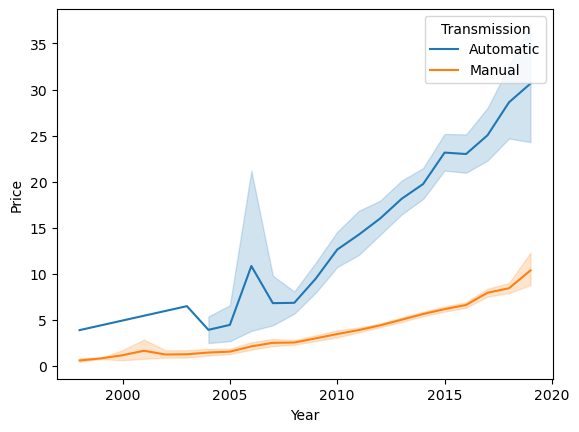

In [45]:
sns.lineplot(data=df,x='Year',y='Price',hue='Transmission')
#price increasing with time
#demand of automatic cars is increasing more with time than manual cars.

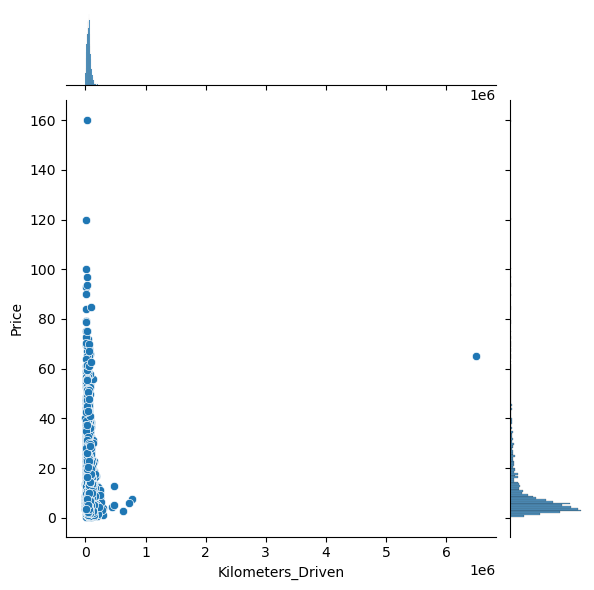

In [46]:
sns.jointplot(data=df,x='Kilometers_Driven',y='Price')
#more price for less no of kilometers driven
#2-3 outliers can also be seen.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5937 entries, 0 to 5960
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5937 non-null   object  
 1   Location           5926 non-null   object  
 2   Year               5935 non-null   float64 
 3   Kilometers_Driven  5929 non-null   float64 
 4   Fuel_Type          5937 non-null   category
 5   Transmission       5910 non-null   category
 6   Owner_Type         5922 non-null   category
 7   Mileage            5935 non-null   float64 
 8   Engine             5920 non-null   float64 
 9   Power              5905 non-null   float64 
 10  Colour             5926 non-null   object  
 11  Seats              5932 non-null   float64 
 12  No. of Doors       5936 non-null   float64 
 13  New_Price          809 non-null    object  
 14  Price              5937 non-null   float64 
 15  Age                5935 non-null   float64 
 16  Brand 

In [48]:
df.isnull().sum()
#checking for missing values

Name                    0
Location               11
Year                    2
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  32
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5128
Price                   0
Age                     2
Brand                   0
Model                   0
dtype: int64

In [49]:
#Colour, No. of Doors, seats is not an important feature to predict the price , so dropping column 'colour'

df.drop('Colour',axis=1,inplace=True)
df.drop('No. of Doors',axis=1,inplace=True)
df.drop('Seats',axis=1,inplace=True)

In [59]:
#handling missing values

# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1)

#Investigating how many missing values per row are there for each variable
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30 , f'\n For the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n')

****************************** 
 For the rows with exactly 1 missing values, NAs are found in:
Location         1
Owner_Type       4
New_Price     5108
dtype: int64


****************************** 
 For the rows with exactly 2 missing values, NAs are found in:
Location              4
Kilometers_Driven     2
Owner_Type           11
New_Price            13
dtype: int64


****************************** 
 For the rows with exactly 3 missing values, NAs are found in:
Location             6
Kilometers_Driven    6
New_Price            6
dtype: int64




In [51]:
# missing values with median.
#since, engine ,power, age ,mileage are significant in predicting new price
#We can start filling missing values by grouping name and year and fill in missing values with median

df['Year'].fillna(df['Year'].median(), inplace=True) 

df['Engine']=df.groupby(['Name','Year'],group_keys=False)['Engine'].apply(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['Name','Year'],group_keys=False)['Power'].apply(lambda x:x.fillna(x.median()))
df['Mileage']=df.groupby(['Name','Year'],group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))

In [52]:
col=['Engine','Power','Mileage']
df[col].isnull().sum()

Engine     1
Power      1
Mileage    2
dtype: int64

In [53]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate values
df['Mileage']=df.groupby(['Brand','Model'],group_keys=False)['Mileage'].apply(lambda x:x.fillna(x.median()))
df['Age']=df.groupby(['Brand','Model'],group_keys=False)['Age'].apply(lambda x:x.fillna(x.median()))
df['Engine']=df.groupby(['Brand','Model'],group_keys=False)['Engine'].apply(lambda x:x.fillna(x.median()))
df['Power']=df.groupby(['Brand','Model'],group_keys=False)['Power'].apply(lambda x:x.fillna(x.median()))

In [54]:
df[col].isnull().sum()

Engine     0
Power      0
Mileage    2
dtype: int64

In [55]:
#2 missing values in mileage column --> dropping them
df.dropna(subset=['Mileage'], inplace=True)
#subset=['Mileage'] specifies that you want to consider only the "Mileage" column when
#determining whether a row has missing values

In [95]:
df.isnull().sum()

Name                    0
Location               11
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type             15
Mileage                 0
Engine                  0
Power                   0
New_Price            5127
Price                   0
Age                     0
Brand                   0
Model                   0
dtype: int64

In [57]:
#filling missing values in Transmission 
most_frequent_category = df['Transmission'].mode()[0]
df['Transmission'].fillna(most_frequent_category, inplace=True)

In [63]:
mean_kilometers = df['Kilometers_Driven'].mean()
df['Kilometers_Driven'].fillna(mean_kilometers, inplace=True)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5935 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5935 non-null   object  
 1   Location           5924 non-null   object  
 2   Year               5935 non-null   float64 
 3   Kilometers_Driven  5935 non-null   float64 
 4   Fuel_Type          5935 non-null   category
 5   Transmission       5935 non-null   category
 6   Owner_Type         5920 non-null   category
 7   Mileage            5935 non-null   float64 
 8   Engine             5935 non-null   float64 
 9   Power              5935 non-null   float64 
 10  New_Price          808 non-null    object  
 11  Price              5935 non-null   float64 
 12  Age                5935 non-null   float64 
 13  Brand              5935 non-null   object  
 14  Model              5935 non-null   object  
dtypes: category(3), float64(7), object(5)
memory usage: 620

In [100]:
df["Location"] = df["Location"].astype("category")
df['Brand'] =df['Brand'].astype("category")

In [101]:
#dropping remaining rows
#cannot further fill this rows so dropping them

df.dropna(inplace=True,axis=0)

In [102]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
New_Price            0
Price                0
Age                  0
Brand                0
Model                0
dtype: int64

In [104]:
df.shape

(801, 15)

C:\Users\vishakha\AppData\Local\Temp\ipykernel_17072\4284199096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="YlGnBu" )


<Axes: >

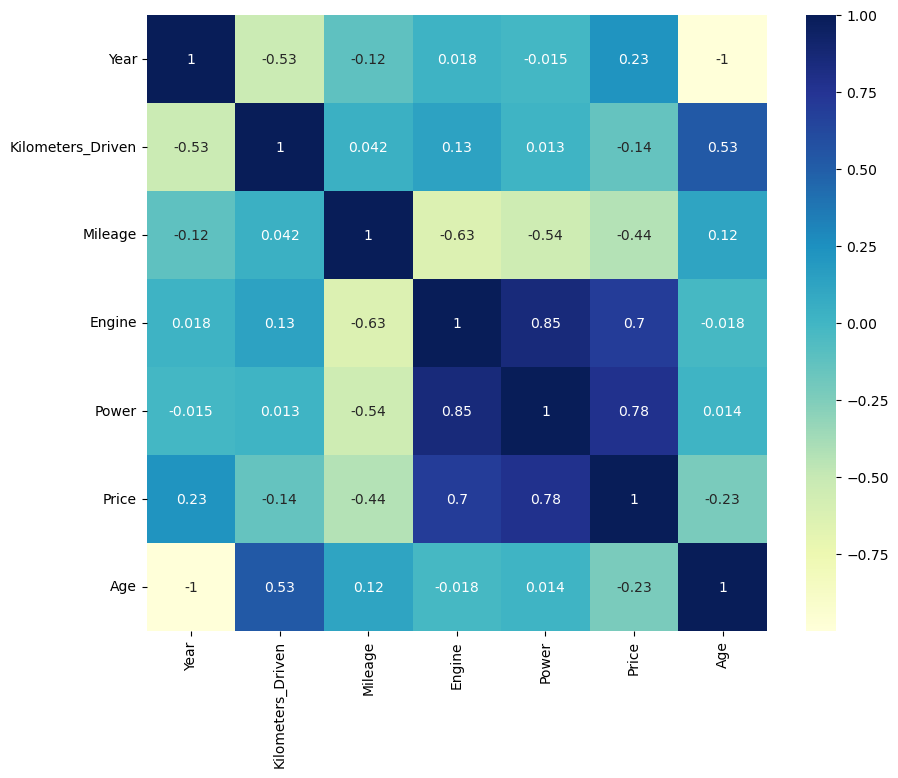

In [105]:
axes,fig=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu" )

<Axes: title={'center': 'Price VS Engine based on Transmission'}, xlabel='Price', ylabel='Engine'>

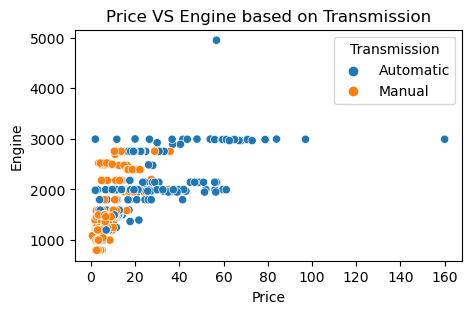

In [108]:
#Engine vs Price and Transmimssion
plt.figure(figsize=(5,3))
plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price', hue='Transmission', data=df)

<Axes: xlabel='Price', ylabel='Mileage'>

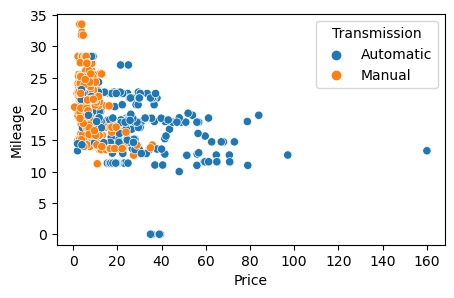

In [109]:
#mileage vs Price 
plt.figure(figsize=(5,3))
sns.scatterplot(y='Mileage', x='Price', hue='Transmission', data=df)

<Axes: title={'center': 'Price based on manufacturing Year of model'}, xlabel='Year', ylabel='Price'>

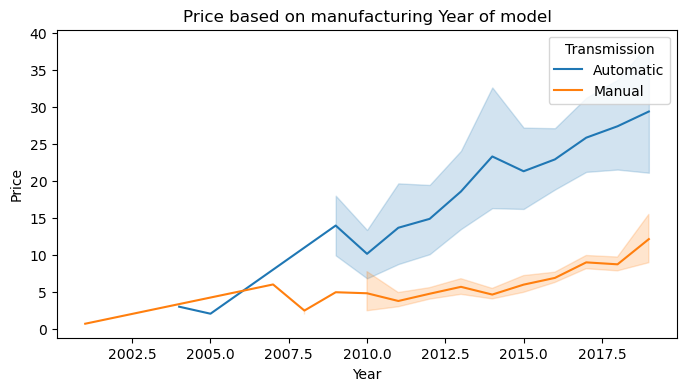

In [112]:
#Price Vs Year Vs Transmission
plt.figure(figsize=(8,4))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price',hue='Transmission',data=df)

<Axes: title={'center': 'Price Vs Year VS FuelType'}, xlabel='Year', ylabel='Price'>

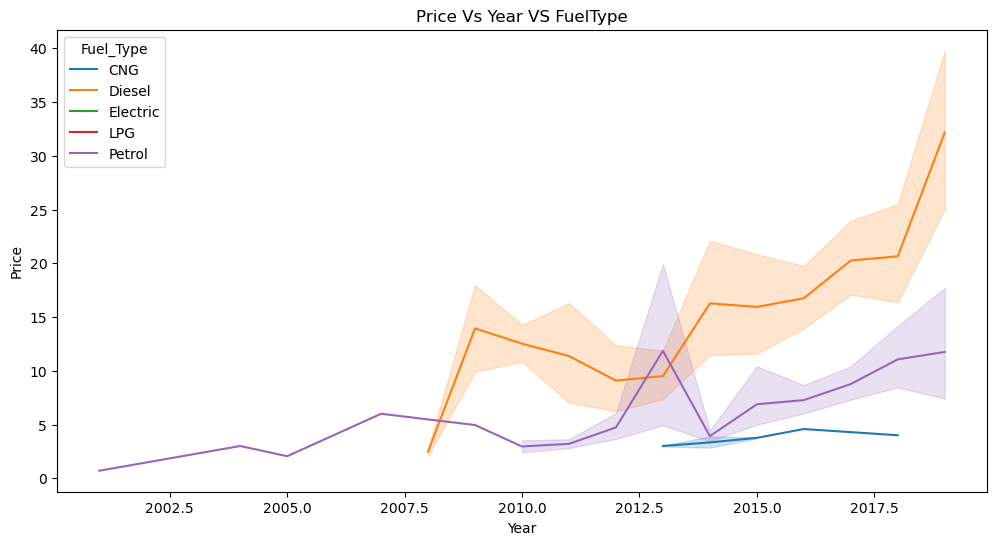

In [121]:
#Price Vs Year VS Fuel Type
plt.figure(figsize=(12,6))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price',hue='Fuel_Type',data=df)

<Axes: title={'center': 'Price Vs Year VS Owner_Type'}, xlabel='Year', ylabel='Price'>

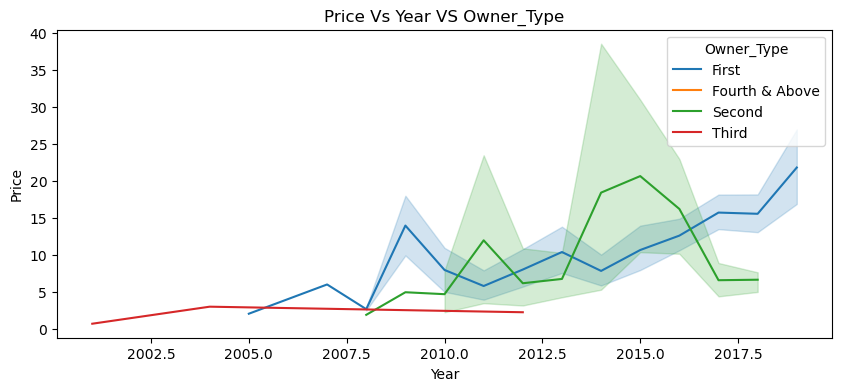

In [126]:
plt.figure(figsize=(10,4))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price',hue='Owner_Type',data=df)

In [128]:
df.drop(['Name','Model','Year','Brand'],axis=1,inplace=True)

model building